In [ ]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# load dataset
df = pd.read_csv("/content/water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


**Classification Before Preprocessing**

In [ ]:
# data split
X = df.drop('Potability', axis=1)
y = df['Potability']
X.shape, y.shape

# splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=0)

In [ ]:
X_train

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2128,5.514748,228.735924,35343.628580,4.346608,NaN,526.112381,14.930982,46.780508,2.798158
1519,NaN,210.732854,13671.416030,8.546187,418.470551,352.252328,10.353659,45.304007,3.364891
40,NaN,233.858996,11703.923907,4.599388,309.039320,349.399633,18.338893,42.677465,3.510004
1151,4.303575,227.007086,7323.302301,7.490508,326.695199,412.896404,12.906730,68.748918,2.010537
2404,9.624727,217.372780,25175.754158,9.883946,329.174454,394.054835,20.277571,85.840258,2.615257
...,...,...,...,...,...,...,...,...,...
835,7.440825,183.362713,17259.852302,4.610245,335.626443,452.995293,9.700906,80.537065,2.496343
3264,5.893103,239.269481,20526.666156,6.349561,341.256362,403.617560,18.963707,63.846319,4.390702
1653,6.648005,191.841801,15176.290678,5.661663,NaN,471.047129,15.438287,56.532387,3.829784
2607,7.675914,233.300759,23673.100606,8.407497,NaN,232.613624,18.459408,60.993590,5.040461


In [ ]:
# creating model object
model_xgb = XGBClassifier(max_depth= 8, n_estimators= 125, 
                          random_state= 0,  learning_rate= 0.03, n_jobs=5)

# training XGBoost model
model_xgb.fit(X_train, y_train)

# making prediction
pred_xgb = model_xgb.predict(X_test)

In [ ]:
# calculating accuracy score
xgb = accuracy_score(y_test, pred_xgb)
# calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, pred_xgb))
print("Root Mean Squared Error: ", rmse)
print("Test Accuracy: {}%".format(round(xgb*100,2)))

Root Mean Squared Error:  0.5576518714718867
Test Accuracy: 68.9%


In [ ]:
print(classification_report(y_test,pred_xgb))

              precision    recall  f1-score   support

           0       0.69      0.91      0.79       412
           1       0.68      0.31      0.43       244

    accuracy                           0.69       656
   macro avg       0.68      0.61      0.61       656
weighted avg       0.69      0.69      0.65       656



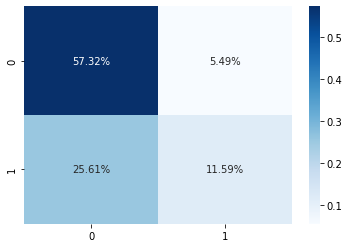

In [ ]:
# confusion Maxtrix
cm4 = confusion_matrix(y_test, pred_xgb)
sns.heatmap(cm4/np.sum(cm4), annot = True, fmt=  '0.2%', cmap = 'Blues')

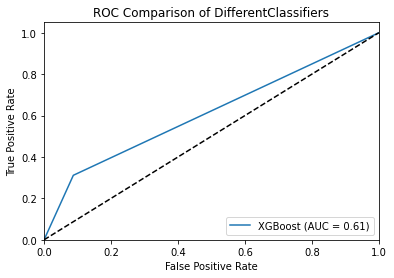

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve

#calculate the ROC AUC score for each model
roc_auc_xgb = roc_auc_score(y_test, pred_xgb)

#get the fpr and tpr for each model
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, pred_xgb)

#plot the ROC curve for each model
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (AUC = %0.2f)' % roc_auc_xgb)

#plot the random guessing line
plt.plot([0, 1], [0, 1], 'k--')

#set the plot properties
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Comparison of DifferentClassifiers')
plt.legend(loc="lower right")
plt.show()

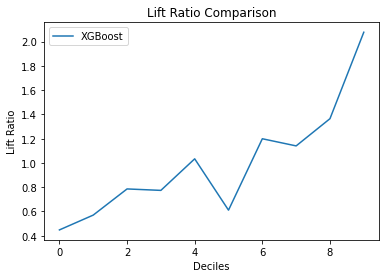

In [ ]:
# function to calculate lift ratio for a given model
def calculate_lift_ratio(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    df = X_test.copy()
    df['predictions'] = y_pred_proba
    df['target'] = y_test
    df.sort_values('predictions', ascending=False, inplace=True)
    df['decile'] = pd.qcut(df['predictions'], q=10, labels=False, duplicates='drop')
    overall_positive_rate = df['target'].mean()
    decile_positive_rate = df.groupby(['decile'])['target'].mean()
    lift = decile_positive_rate / overall_positive_rate
    return lift

# define the models
xgb = XGBClassifier()

# calculate lift ratios for each model

lift_ratio_xgb = calculate_lift_ratio(xgb, X_train, X_test, y_train, y_test)
# plot the lift ratio for each model
plt.figure()
plt.plot(lift_ratio_xgb, label='XGBoost')
plt.xlabel('Deciles')
plt.ylabel('Lift Ratio')
plt.title('Lift Ratio Comparison')
plt.legend()
plt.show()

**Preprocessing**

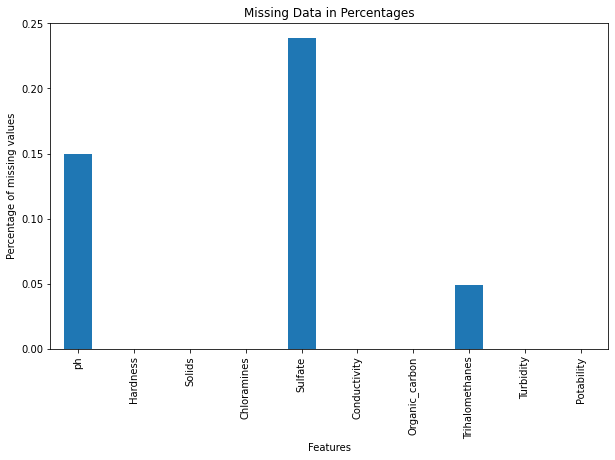

In [ ]:
# preprocessing
df.isnull().mean().plot.bar(figsize=(10,6)) 
plt.ylabel('Percentage of missing values') 
plt.xlabel('Features') 
plt.title('Missing Data in Percentages');

In [ ]:
print(df.isnull().sum())

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [ ]:
rata_ph = df['ph'].mean()
rata_Trihalomethanes = df['Trihalomethanes'].mean()
modus_Sulfate = df['Sulfate'].mode()[0]

df['ph'] = df['ph'].fillna(rata_ph)
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(rata_Trihalomethanes)
df['Sulfate'] = df['Sulfate'].fillna(modus_Sulfate)

In [ ]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

**Classification After Preprocessing**

In [ ]:
# data split
X = df.drop('Potability', axis=1)
y = df['Potability']
X.shape, y.shape

((3276, 9), (3276,))

In [ ]:
# splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=0)

In [ ]:
X_train

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2128,5.514748,228.735924,35343.628580,4.346608,129.000000,526.112381,14.930982,46.780508,2.798158
1519,7.080795,210.732854,13671.416030,8.546187,418.470551,352.252328,10.353659,45.304007,3.364891
40,7.080795,233.858996,11703.923907,4.599388,309.039320,349.399633,18.338893,42.677465,3.510004
1151,4.303575,227.007086,7323.302301,7.490508,326.695199,412.896404,12.906730,68.748918,2.010537
2404,9.624727,217.372780,25175.754158,9.883946,329.174454,394.054835,20.277571,85.840258,2.615257
...,...,...,...,...,...,...,...,...,...
835,7.440825,183.362713,17259.852302,4.610245,335.626443,452.995293,9.700906,80.537065,2.496343
3264,5.893103,239.269481,20526.666156,6.349561,341.256362,403.617560,18.963707,63.846319,4.390702
1653,6.648005,191.841801,15176.290678,5.661663,129.000000,471.047129,15.438287,56.532387,3.829784
2607,7.675914,233.300759,23673.100606,8.407497,129.000000,232.613624,18.459408,60.993590,5.040461


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2620, 9)
(2620,)
(656, 9)
(656,)


In [ ]:
# creating model object
model_xgb = XGBClassifier(max_depth= 8, n_estimators= 125, 
                          random_state= 0,  learning_rate= 0.03, n_jobs=5)

In [ ]:
# training XGBoost model
model_xgb.fit(X_train, y_train)

XGBClassifier(learning_rate=0.03, max_depth=8, n_estimators=125, n_jobs=5)

In [ ]:
# making prediction
pred_xgb = model_xgb.predict(X_test)

In [ ]:
# calculating accuracy score
xgb = accuracy_score(y_test, pred_xgb)
# calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, pred_xgb))
print("Root Mean Squared Error: ", rmse)
print("Test Accuracy: {}%".format(round(xgb*100,2)))

Root Mean Squared Error:  0.5711562940169022
Test Accuracy: 67.38%


In [ ]:
print(classification_report(y_test,pred_xgb))

              precision    recall  f1-score   support

           0       0.68      0.89      0.77       412
           1       0.62      0.31      0.41       244

    accuracy                           0.67       656
   macro avg       0.65      0.60      0.59       656
weighted avg       0.66      0.67      0.64       656



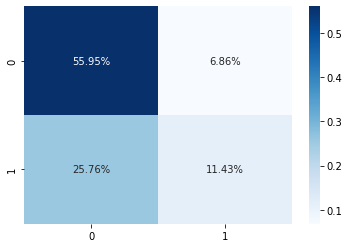

In [ ]:
# confusion Maxtrix
cm4 = confusion_matrix(y_test, pred_xgb)
sns.heatmap(cm4/np.sum(cm4), annot = True, fmt=  '0.2%', cmap = 'Blues')

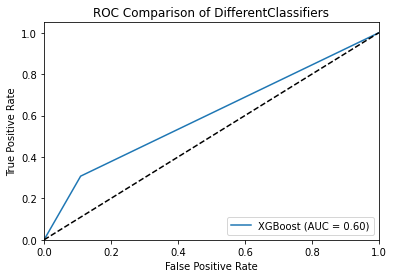

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve

#calculate the ROC AUC score for each model
roc_auc_xgb = roc_auc_score(y_test, pred_xgb)

#get the fpr and tpr for each model
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, pred_xgb)

#plot the ROC curve for each model
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (AUC = %0.2f)' % roc_auc_xgb)

#plot the random guessing line
plt.plot([0, 1], [0, 1], 'k--')

#set the plot properties
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Comparison of DifferentClassifiers')
plt.legend(loc="lower right")
plt.show()

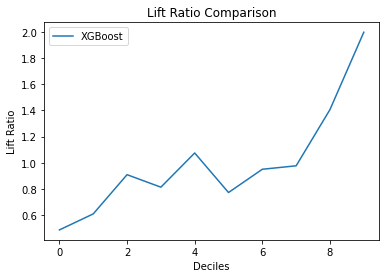

In [ ]:
# function to calculate lift ratio for a given model
def calculate_lift_ratio(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    df = X_test.copy()
    df['predictions'] = y_pred_proba
    df['target'] = y_test
    df.sort_values('predictions', ascending=False, inplace=True)
    df['decile'] = pd.qcut(df['predictions'], q=10, labels=False, duplicates='drop')
    overall_positive_rate = df['target'].mean()
    decile_positive_rate = df.groupby(['decile'])['target'].mean()
    lift = decile_positive_rate / overall_positive_rate
    return lift

# define the models
xgb = XGBClassifier()

# calculate lift ratios for each model

lift_ratio_xgb = calculate_lift_ratio(xgb, X_train, X_test, y_train, y_test)
# plot the lift ratio for each model
plt.figure()
plt.plot(lift_ratio_xgb, label='XGBoost')
plt.xlabel('Deciles')
plt.ylabel('Lift Ratio')
plt.title('Lift Ratio Comparison')
plt.legend()
plt.show()